In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


In [2]:
limit_rows   = 7000000
df           = pd.read_csv("C:\\Santander\\train_ver2.csv",dtype={"sexo":str,
                                                    "ind_nuevo":str,
                                                    "ult_fec_cli_1t":str,
                                                    "indext":str}, nrows=limit_rows)
unique_ids   = pd.Series(df["ncodpers"].unique())
limit_people = 1.2e4
unique_id    = unique_ids.sample(n=limit_people)
df           = df[df.ncodpers.isin(unique_id)]
df.describe()

C:\Users\student10\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\student10\Anaconda2\lib\site-packages\pandas\core\generic.py:2572: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  locs = rs.choice(axis_length, size=n, replace=replace, p=weights)
C:\Users\student10\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ncodpers,indrel,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,9.338900e+04,93046.000000,93046.0,92541.000000,93046.000000,7.709700e+04,93389.0,93389.0,93389.000000,93389.000000,...,93389.000000,93389.000000,93389.000000,93389.000000,93389.000000,93389.000000,93389.000000,93191.000000,93191.000000,93389.000000
mean,7.996833e+05,1.157986,1.0,26.599226,0.493519,1.363816e+05,0.0,0.0,0.702224,0.000407,...,0.006821,0.010676,0.002581,0.056099,0.052586,0.028044,0.004347,0.059544,0.065081,0.138796
std,4.223790e+05,3.931650,0.0,12.762342,0.499961,2.598026e+05,0.0,0.0,0.457283,0.020168,...,0.082307,0.102771,0.050734,0.230113,0.223208,0.165099,0.065792,0.236642,0.246671,0.345735
min,1.592900e+04,1.000000,1.0,1.000000,0.000000,8.547750e+03,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.139520e+05,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
50%,9.124330e+05,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
75%,1.164990e+06,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
max,1.495427e+06,99.000000,1.0,52.000000,1.000000,1.601868e+07,0.0,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
df["fecha_dato"] = pd.to_datetime(df["fecha_dato"],format="%Y-%m-%d")
df["fecha_alta"] = pd.to_datetime(df["fecha_alta"],format="%Y-%m-%d")
df["fecha_dato"].unique()

array(['2015-01-28T00:00:00.000000000', '2015-02-28T00:00:00.000000000',
       '2015-03-28T00:00:00.000000000', '2015-04-28T00:00:00.000000000',
       '2015-05-28T00:00:00.000000000', '2015-06-28T00:00:00.000000000',
       '2015-07-28T00:00:00.000000000', '2015-08-28T00:00:00.000000000',
       '2015-09-28T00:00:00.000000000', '2015-10-28T00:00:00.000000000'], dtype='datetime64[ns]')

In [4]:
df['month'] = pd.DatetimeIndex(df['fecha_dato']).month
df['age']   = pd.to_numeric(df['age'], errors='coerce')

In [5]:
df.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado              True
pais_residencia           True
sexo                      True
age                       True
fecha_alta                True
ind_nuevo                 True
antiguedad               False
indrel                    True
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                   True
indext                    True
conyuemp                  True
canal_entrada             True
indfall                   True
tipodom                   True
cod_prov                  True
nomprov                   True
ind_actividad_cliente     True
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp

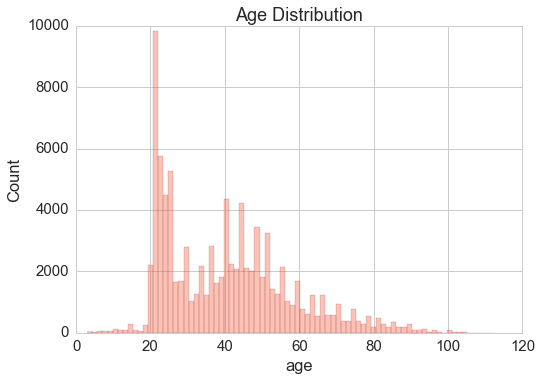

In [6]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(df["age"].dropna(),
                 bins=80,
                 kde=False,
                 color="tomato")
    sns.plt.title("Age Distribution")
    plt.ylabel("Count")

In [7]:
df.loc[df.age < 18,"age"]  = df.loc[(df.age >= 18) & (df.age <= 30),"age"].mean(skipna=True)
df.loc[df.age > 100,"age"] = df.loc[(df.age >= 30) & (df.age <= 100),"age"].mean(skipna=True)
df["age"].fillna(df["age"].mean(),inplace=True)
df["age"]                  = df["age"].astype(int)

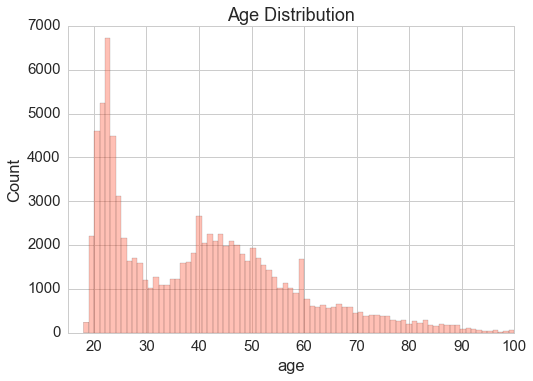

In [8]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(df["age"].dropna(),
                 bins=80,
                 kde=False,
                 color="tomato")
    sns.plt.title("Age Distribution")
    plt.ylabel("Count")
    plt.xlim((15,100))

In [9]:
df["ind_nuevo"].isnull().sum()

343

In [10]:
months_active = df.loc[df["ind_nuevo"].isnull(),:].groupby("ncodpers", sort=False).size()
months_active.max()

6

In [11]:
df.loc[df["ind_nuevo"].isnull(),"ind_nuevo"] = 1

In [12]:
df.antiguedad = pd.to_numeric(df.antiguedad,errors="coerce")
np.sum(df["antiguedad"].isnull())

343

In [13]:
df.loc[df["antiguedad"].isnull(),"ind_nuevo"].describe()

count     343
unique      1
top         1
freq      343
Name: ind_nuevo, dtype: int64

In [14]:
df.loc[df.antiguedad.isnull(), "antiguedad"] = df.antiguedad.min()
df.loc[df.antiguedad <0, "antiguedad"]      = 0 

In [15]:
dates = df.loc[:, "fecha_alta"].sort_values().reset_index()
median_date = int(np.median(dates.index.values))
df.loc[df.fecha_alta.isnull(), "fecha_alta"] = dates.loc[median_date, "fecha_alta"]
df["fecha_alta"].describe()

count                   93389
unique                   3926
top       2014-07-28 00:00:00
freq                      504
first     1995-01-16 00:00:00
last      2015-10-30 00:00:00
Name: fecha_alta, dtype: object

In [16]:
pd.Series([i for i in df.indrel]).value_counts()

1.0     92896
99.0      150
dtype: int64

In [17]:
df.loc[df.indrel.isnull(), "indrel"] = 1

In [18]:
df.drop(["tipodom", "cod_prov"], axis=1,inplace=True)

In [19]:
df.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado              True
pais_residencia           True
sexo                      True
age                      False
fecha_alta               False
ind_nuevo                False
antiguedad               False
indrel                   False
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                   True
indext                    True
conyuemp                  True
canal_entrada             True
indfall                   True
nomprov                   True
ind_actividad_cliente     True
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp_fin_ult1        False
ind_deco_fin_ult1        False
ind_deme

In [20]:
np.sum(df["ind_actividad_cliente"].isnull())

343

In [21]:
df.loc[df.ind_actividad_cliente.isnull(), "ind_actividad_cliente"] = df["ind_actividad_cliente"].median()

In [22]:
df.nomprov.unique()

array(['SEVILLA', 'TOLEDO', 'VALENCIA', 'AVILA', 'MADRID', 'VALLADOLID',
       'MALAGA', 'HUELVA', 'BARCELONA', 'BIZKAIA', 'PALMAS, LAS',
       'CORU\xc3\x91A, A', 'BURGOS', 'OURENSE', 'CASTELLON', 'LERIDA',
       'ZARAGOZA', 'NAVARRA', 'GUADALAJARA', 'BADAJOZ', 'PONTEVEDRA',
       'CIUDAD REAL', 'LUGO', 'RIOJA, LA', 'CADIZ', 'GRANADA', 'ALBACETE',
       nan, 'SALAMANCA', 'MURCIA', 'CACERES', 'LEON', 'SEGOVIA', 'ZAMORA',
       'CANTABRIA', 'GIRONA', 'CUENCA', 'CORDOBA', 'TARRAGONA', 'HUESCA',
       'ALMERIA', 'ALICANTE', 'ASTURIAS', 'TERUEL', 'BALEARS, ILLES',
       'SORIA', 'PALENCIA', 'ALAVA', 'SANTA CRUZ DE TENERIFE', 'GIPUZKOA',
       'JAEN', 'CEUTA', 'MELILLA'], dtype=object)

In [23]:
df.loc[df.nomprov== "CORU\xc3\x91A, A","nomprov"] = "CORUNA, A"

In [24]:
df.loc[df.nomprov.isnull(), "nomprov"] = "UNKNOWN"

In [25]:
df.renta.isnull().sum()

16292

In [26]:
#df.loc[df.renta.notnull(),:].groupby("nomprov").agg([{"Sum":sum},{"Mean":mean}])
incomes = df.loc[df.renta.notnull(),:].groupby("nomprov").agg({"renta":{"Median_Income":median}})
incomes.sort_values(by=("renta","Median_Income"),inplace=True)
incomes.reset_index(inplace=True)
incomes.nomprov = incomes.nomprov.astype("category", categories=[i for i in df.nomprov.unique()],ordered=False)
incomes.head()

,nomprov,renta
,,Median_Income
0,CEUTA,54880.11
1,AVILA,64589.04
2,CASTELLON,65082.54
3,LUGO,65374.59
4,BADAJOZ,65632.08


([<matplotlib.axis.YTick at 0x11974080>,
 <a list of 5 Text yticklabel objects>)

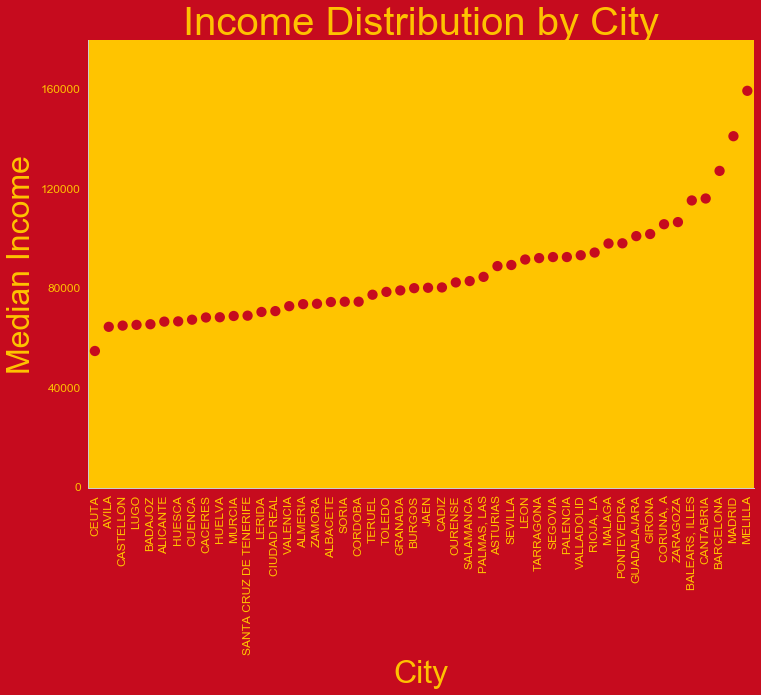

In [27]:
with sns.axes_style({
        "axes.facecolor":   "#ffc400",
        "axes.grid"     :    False,
        "figure.facecolor": "#c60b1e"}):
    h = sns.factorplot(data=incomes,
                   x="nomprov",
                   y=("renta","Median_Income"),
                   order=(i for i in incomes.nomprov),
                   size=7,
                   aspect=1.5,
                   scale=1.0,
                   color="#c60b1e",
                   linestyles="None")
plt.xticks(rotation=90)
plt.tick_params(labelsize=12,labelcolor="#ffc400")#
plt.ylabel("Median Income",size=32,color="#ffc400")
plt.xlabel("City",size=32,color="#ffc400")
plt.title("Income Distribution by City",size=40,color="#ffc400")
plt.ylim(0,180000)
plt.yticks(range(0,180000,40000))

In [28]:
grouped        = df.groupby("nomprov").agg({"renta":lambda x: x.median(skipna=True)}).reset_index()
new_incomes    = pd.merge(df,grouped,how="inner",on="nomprov").loc[:, ["nomprov","renta_y"]]
new_incomes    = new_incomes.rename(columns={"renta_y":"renta"}).sort_values("renta").sort_values("nomprov")
df.sort_values("nomprov",inplace=True)
df             = df.reset_index()
new_incomes    = new_incomes.reset_index()

In [29]:
df.loc[df.renta.isnull(),"renta"] = new_incomes.loc[df.renta.isnull(),"renta"].reset_index()
df.loc[df.renta.isnull(),"renta"] = df.loc[df.renta.notnull(),"renta"].median()
df.sort_values(by="fecha_dato",inplace=True)

In [30]:
df.ind_nomina_ult1.isnull().sum()

198

In [31]:
df.loc[df.ind_nomina_ult1.isnull(), "ind_nomina_ult1"] = 0
df.loc[df.ind_nom_pens_ult1.isnull(), "ind_nom_pens_ult1"] = 0

In [32]:
string_data = df.select_dtypes(include=["object"])
missing_columns = [col for col in string_data if string_data[col].isnull().any()]
for col in missing_columns:
    print("Unique values for {0}:\n{1}\n".format(col,string_data[col].unique()))
del string_data

Unique values for ind_empleado:
[nan 'N' 'A' 'B' 'F']

Unique values for pais_residencia:
[nan 'ES' 'PL' 'VE' 'DE' 'RO' 'ZA' 'PT' 'GB' 'US' 'SE' 'PY' 'FR' 'AT' 'PE'
 'BE' 'TH' 'AR' 'IT' 'MX' 'CL' 'DK' 'EC' 'BR' 'FI']

Unique values for sexo:
[nan 'V' 'H']

Unique values for ult_fec_cli_1t:
[nan '2015-07-22' '2015-07-01' '2015-07-28' '2015-07-13' '2015-07-30'
 '2015-07-09' '2015-07-20' '2015-07-23' '2015-07-07' '2015-07-17'
 '2015-07-02' '2015-07-16' '2015-07-10' '2015-07-27' '2015-07-14'
 '2015-08-27' '2015-08-20' '2015-08-07' '2015-08-21' '2015-08-25'
 '2015-08-14' '2015-08-18' '2015-08-12' '2015-08-17' '2015-08-10'
 '2015-09-21' '2015-09-23' '2015-09-01' '2015-09-02' '2015-09-11'
 '2015-09-25' '2015-09-22' '2015-09-14' '2015-09-15' '2015-09-08'
 '2015-09-04' '2015-09-24' '2015-10-05' '2015-10-20' '2015-10-02'
 '2015-10-07' '2015-10-26' '2015-10-13' '2015-10-27' '2015-10-22'
 '2015-10-01' '2015-10-19' '2015-10-09' '2015-10-06']

Unique values for indrel_1mes:
[nan 1.0 '1.0' '1' 2.0 '4

In [33]:
df.loc[df.indfall.isnull(),"indfall"] = "N"
df.loc[df.tiprel_1mes.isnull(),"tiprel_1mes"] = "A"
df.tiprel_1mes = df.tiprel_1mes.astype("category")

map_dict = { 1.0  : "1",
            "1.0" : "1",
            "1"   : "1",
            "3.0" : "3",
            "P"   : "P",
            3.0   : "3",
            2.0   : "2",
            "3"   : "3",
            "2.0" : "2",
            "4.0" : "4",
            "4"   : "4",
            "2"   : "2"}

df.indrel_1mes.fillna("P",inplace=True)
df.indrel_1mes = df.indrel_1mes.apply(lambda x: map_dict.get(x,x))
df.indrel_1mes = df.indrel_1mes.astype("category")


unknown_cols = [col for col in missing_columns if col not in ["indfall","tiprel_1mes","indrel_1mes"]]
for col in unknown_cols:
    df.loc[df[col].isnull(),col] = "UNKNOWN"
    

In [34]:
df.isnull().any()

index                    False
fecha_dato               False
ncodpers                 False
ind_empleado             False
pais_residencia          False
sexo                     False
age                      False
fecha_alta               False
ind_nuevo                False
antiguedad               False
indrel                   False
ult_fec_cli_1t           False
indrel_1mes              False
tiprel_1mes              False
indresi                  False
indext                   False
conyuemp                 False
canal_entrada            False
indfall                  False
nomprov                  False
ind_actividad_cliente    False
renta                    False
segmento                 False
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp_fin_ult1        False
ind_deco

In [35]:
feature_cols = df.iloc[:1,].filter(regex="ind_+.*ult.*").columns.values
for col in feature_cols:
    df[col] = df[col].astype(int)

In [36]:
unique_months = pd.DataFrame(pd.Series(df.fecha_dato.unique()).sort_values()).reset_index(drop=True)
unique_months["month_id"] = pd.Series(range(1,1+unique_months.size)) # start with month 1, not 0 to match what we already have
unique_months["month_next_id"] = 1 + unique_months["month_id"]
unique_months.rename(columns={0:"fecha_dato"},inplace=True)
df = pd.merge(df,unique_months,on="fecha_dato")

In [37]:
def status_change(x):
    diffs = x.diff().fillna(0)# first occurrence will be considered Maintained, 
    #which is a little lazy. A better way would be to check if 
    #the earliest date was the same as the earliest we have in the dataset
    #and consider those separately. Entries with earliest dates later than that have 
    #joined and should be labeled as "Added"
    label = ["Added" if i==1 \
         else "Dropped" if i==-1 \
         else "Maintained" for i in diffs]
    return label

In [38]:
# df.loc[:, feature_cols] = df..groupby("ncodpers").apply(status_change)
df.loc[:, feature_cols] = df.loc[:, [i for i in feature_cols]+["ncodpers"]].groupby("ncodpers").transform(status_change)

In [39]:
df = pd.melt(df, id_vars   = [col for col in df.columns if col not in feature_cols],
            value_vars= [col for col in feature_cols])
df = df.loc[df.value!="Maintained",:]
df.shape

(7544, 28)

In [40]:
df.head(6)

,index,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,...,indfall,nomprov,ind_actividad_cliente,renta,segmento,month,month_id,month_next_id,variable,value
195253,816033,2015-02-28,168721,N,ES,V,37,2000-03-22,0,184.0,...,N,MADRID,0.0,80720.01,02 - PARTICULARES,2,2,3,ind_cco_fin_ult1,Dropped
195275,888830,2015-02-28,417764,N,ES,V,39,2003-05-05,0,146.0,...,N,MADRID,1.0,90887.34,02 - PARTICULARES,2,2,3,ind_cco_fin_ult1,Dropped
195302,1021613,2015-02-28,1336342,N,ES,H,64,2014-10-20,0,9.0,...,N,MADRID,1.0,66367.95,02 - PARTICULARES,2,2,3,ind_cco_fin_ult1,Dropped
195327,1216356,2015-02-28,1039053,N,ES,H,22,2012-08-01,0,35.0,...,N,"CORUNA, A",1.0,101925.48,03 - UNIVERSITARIO,2,2,3,ind_cco_fin_ult1,Dropped
195395,1195411,2015-02-28,1122647,N,ES,V,68,2013-06-11,0,25.0,...,N,MADRID,1.0,360720.12,02 - PARTICULARES,2,2,3,ind_cco_fin_ult1,Added
195419,1010556,2015-02-28,1168562,N,ES,H,22,2013-08-22,0,23.0,...,N,MADRID,1.0,101925.48,03 - UNIVERSITARIO,2,2,3,ind_cco_fin_ult1,Dropped


In [41]:
df[df['ult_fec_cli_1t'].str.contains("01/07/2015")]

,index,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,...,indfall,nomprov,ind_actividad_cliente,renta,segmento,month,month_id,month_next_id,variable,value


In [42]:
df1           = pd.read_csv("C:\\Santander\\train_ver2.csv",dtype={"sexo":str,
                                                    "ind_nuevo":str,
                                                    "ult_fec_cli_1t":str,
                                                    "indext":str}, nrows=limit_rows)

In [43]:
df1df1['ult_fec_cli_1t'].fillna(value=0, axis=1, inplace=True)

NameError: name 'df1df1' is not defined

In [ ]:
df2 = df1.sort_values(ascending=False)

In [ ]:
df2.head()